#**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data=pd.read_csv('data.csv')
dd=pd.read_csv('data.csv')

In [ ]:
data.sample(5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
314,314,0.0174,0.446,241800,0.7520,0.000000,6,0.128,-6.088,1,0.3680,96.318,4.0,0.585,1,Sometimes,Heems
1567,1567,0.9180,0.331,507533,0.0861,0.902000,5,0.106,-21.226,1,0.0354,107.436,4.0,0.152,0,I Have Dreamed,Christian McBride
1476,1476,0.1310,0.522,210816,0.8600,0.020900,10,0.122,-3.773,0,0.1450,128.019,4.0,0.263,0,Open,Yellow Claw
26,26,0.3410,0.411,199500,0.6840,0.000001,11,0.198,-6.889,0,0.3830,110.016,4.0,0.598,1,Lose My Mind,A-Trak
537,537,0.0036,0.396,186627,0.6010,0.531000,0,0.116,-9.347,1,0.0515,129.996,4.0,0.351,1,Wrath Of God,Crystal Castles


### Checking For Missing Values

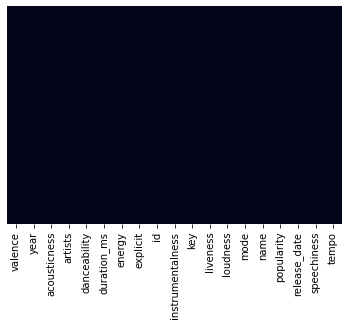

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

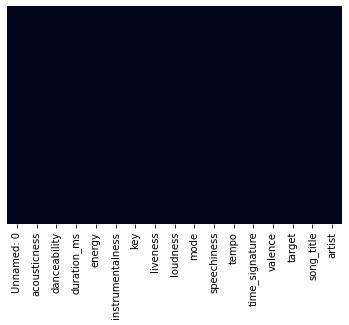

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [ ]:
data.drop(data.columns[[0, 3, 5, 6, 9, 12, 14,15,16]], axis = 1, inplace = True)

In [ ]:
data.head()

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,0.0102,0.833,0.434,0.1650,-8.795,0.4310,150.062,0.286
1,0.1990,0.743,0.359,0.1370,-10.401,0.0794,160.083,0.588
2,0.0344,0.838,0.412,0.1590,-7.148,0.2890,75.044,0.173
3,0.6040,0.494,0.338,0.0922,-15.236,0.0261,86.468,0.230
4,0.1800,0.678,0.561,0.4390,-11.648,0.0694,174.004,0.904


## Feature Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X=sc.fit_transform(data)



In [ ]:
Xdf=pd.DataFrame(X,columns=data.columns)
Xdf.head()

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,-0.682467,1.332874,-1.177700,-0.166291,-0.454530,3.763084,1.066709,-0.853039
1,0.043897,0.773830,-1.534468,-0.346454,-0.881573,-0.147529,1.442323,0.368970
2,-0.589363,1.363932,-1.282352,-0.204897,-0.016586,2.183712,-1.745166,-1.310280
3,1.602040,-0.772860,-1.634363,-0.634715,-2.167220,-0.740350,-1.316964,-1.079636
4,-0.029201,0.370075,-0.573574,1.596735,-1.213155,-0.258753,1.964120,1.647627


# **Elbow**

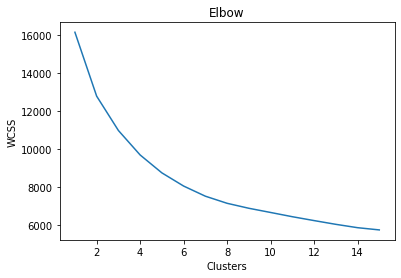

In [ ]:
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,16):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,16),wcss)
plt.title('Elbow')
plt.xlabel('Clusters') 
plt.ylabel('WCSS')
plt.show()



In [ ]:
wcss

[16136.0,
 12781.944593797234,
 10981.489911286157,
 9696.649299936664,
 8757.526861293392,
 8065.914800261735,
 7533.756326186154,
 7161.254384930098,
 6899.971249344391,
 6679.784936892247,
 6457.477828481829,
 6254.174538789747,
 6057.543237900893,
 5881.5400401582965,
 5764.529057853015]

# **Training The k means algorithm** (6,7,8 clusters)

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
labels=kmeans.labels_
c6=dd.assign(Cluster=labels)

In [ ]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
labels=kmeans.labels_
c7=dd.assign(Cluster=labels)

In [ ]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
labels=kmeans.labels_
c8=dd.assign(Cluster=labels)

In [ ]:
c6_summary = c6.groupby(['Cluster']).agg({'danceability':'mean',
    'loudness':'mean',
     'valence':'mean',
    'acousticness':['mean','count'],}).round(1)

c7_summary = c7.groupby(['Cluster']).agg({'danceability':'mean',
    'loudness':'mean',
     'valence':'mean',
    'acousticness':['mean','count'],}).round(1)

c8_summary = c8.groupby(['Cluster']).agg({'danceability':'mean',
    'loudness':'mean',
     'valence':'mean',
    'acousticness':['mean','count'],}).round(1)

In [ ]:
c6_summary

danceability loudness valence acousticness      
                mean     mean    mean         mean count
Cluster                                                 
0                0.6     -7.4     0.3          0.2   487
1                0.5    -15.2     0.2          0.8   168
2                0.6     -5.0     0.4          0.1   217
3                0.7     -6.4     0.7          0.1   612
4                0.7     -7.2     0.5          0.2   192
5                0.5     -5.1     0.4          0.1   341

In [ ]:
c7_summary

danceability loudness valence acousticness      
                mean     mean    mean         mean count
Cluster                                                 
0                0.5     -5.3     0.5          0.1   260
1                0.6     -9.3     0.4          0.6   219
2                0.7     -6.4     0.7          0.1   581
3                0.7     -7.2     0.5          0.2   191
4                0.6     -5.1     0.5          0.1   199
5                0.4    -18.2     0.2          0.9    99
6                0.6     -6.4     0.3          0.1   468

In [ ]:
c8_summary

danceability loudness valence acousticness      
                mean     mean    mean         mean count
Cluster                                                 
0                0.5     -5.3     0.5          0.1   246
1                0.4    -18.5     0.2          0.9    95
2                0.6     -5.0     0.5          0.1   156
3                0.7     -7.1     0.5          0.2   182
4                0.7     -5.6     0.8          0.1   448
5                0.5     -5.9     0.3          0.1   400
6                0.6     -9.0     0.4          0.6   196
7                0.8     -8.6     0.5          0.1   294

In [ ]:
X_df4 = Xdf.drop(data.columns[[2, 3, 5, 6]], axis = 1, inplace = False)

In [ ]:
scaled_c6 = X_df4.copy()
scaled_c6['Cluster'] = c6.Cluster
scaled_c7 = X_df4.copy()
scaled_c7['Cluster'] = c7.Cluster
scaled_c8 = X_df4.copy()
scaled_c8['Cluster'] = c8.Cluster

In [ ]:
scaled_c6.head()

,acousticness,danceability,loudness,valence,Cluster
0,-0.682467,1.332874,-0.454530,-0.853039,4
1,0.043897,0.773830,-0.881573,0.368970,0
2,-0.589363,1.363932,-0.016586,-1.310280,4
3,1.602040,-0.772860,-2.167220,-1.079636,1
4,-0.029201,0.370075,-1.213155,1.647627,3


In [ ]:
scaled_c7.head()

,acousticness,danceability,loudness,valence,Cluster
0,-0.682467,1.332874,-0.454530,-0.853039,3
1,0.043897,0.773830,-0.881573,0.368970,1
2,-0.589363,1.363932,-0.016586,-1.310280,3
3,1.602040,-0.772860,-2.167220,-1.079636,5
4,-0.029201,0.370075,-1.213155,1.647627,2


In [ ]:
scaled_c8.head()

,acousticness,danceability,loudness,valence,Cluster
0,-0.682467,1.332874,-0.454530,-0.853039,3
1,0.043897,0.773830,-0.881573,0.368970,7
2,-0.589363,1.363932,-0.016586,-1.310280,3
3,1.602040,-0.772860,-2.167220,-1.079636,1
4,-0.029201,0.370075,-1.213155,1.647627,0


In [ ]:
c6_melt = pd.melt(
    scaled_c6.reset_index(), 
    id_vars=['Cluster'],
    value_vars=['valence', 'acousticness', 'danceability', 'loudness'], 
    var_name='Attribute',
    value_name='Value')

c7_melt = pd.melt(
    scaled_c7.reset_index(), 
    id_vars=['Cluster'],
    value_vars=['valence', 'acousticness', 'danceability', 'loudness'], 
    var_name='Attribute',
    value_name='Value')

c8_melt = pd.melt(
    scaled_c8.reset_index(), 
    id_vars=['Cluster'],
    value_vars=['valence', 'acousticness', 'danceability', 'loudness'], 
    var_name='Attribute',
    value_name='Value')

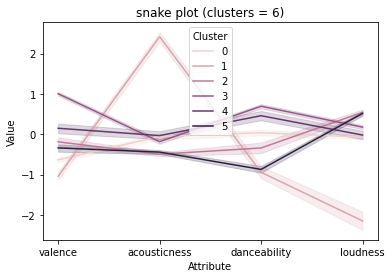

In [ ]:
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.title('snake plot (clusters = 6)')
sns.lineplot(data=c6_melt,x='Attribute',y='Value',hue='Cluster')

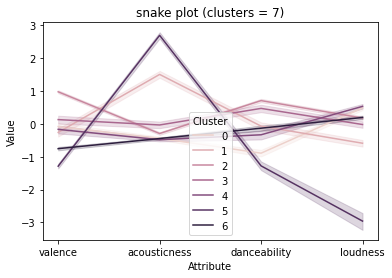

In [ ]:
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.title('snake plot (clusters = 7)')
sns.lineplot(data=c7_melt,x='Attribute',y='Value',hue='Cluster')
plt.show()

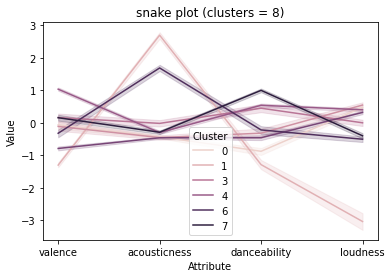

In [ ]:
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.title('snake plot (clusters = 8)')
sns.lineplot(data=c8_melt,x='Attribute',y='Value',hue='Cluster')
plt.show()

In [ ]:
c7.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,Cluster
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future,3
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino,1
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future,3
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House,5
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys,2


## **Making Recommendations On Clusters = 7**

In [ ]:
def recommend(n):
  r = c7[c7['Cluster']==n]
  rr = r.sample(5)
  print (rr['song_title'])



n=c7.song_title.to_list()
v=c7.Cluster.to_list()
while(1):
  print('Enter a song name:\n')
  song=input()
  song.upper()
  if song in n:
    print('Recommendations:\n')
    song_index = n.index(song)
    sv=v[song_index]
    recommend(sv)
    break
  else:
    print('Please enter a valid song name:\n')
    continue





Enter a song name:

Perfect
Please enter a valid song name:

Enter a song name:

perfect
Please enter a valid song name:

Enter a song name:

Mask Off
Recommendations:

114     Queen's Speech 4
1011       T On the Wing
615            Trill Hoe
732                 Dope
1437            Save You
Name: song_title, dtype: object


In [ ]:
print(c7.iloc[114,:])

Unnamed: 0                       114
acousticness                   0.141
danceability                   0.661
duration_ms                   196615
energy                         0.531
instrumentalness                   0
key                                7
liveness                       0.136
loudness                     -10.113
mode                               0
speechiness                    0.548
tempo                         93.287
time_signature                     5
valence                        0.657
target                             1
song_title          Queen's Speech 4
artist                  Lady Leshurr
Cluster                            3
Name: 114, dtype: object


In [ ]:
print(c7.iloc[1011,:])

Unnamed: 0                   1011
acousticness                0.397
danceability                0.739
duration_ms                181714
energy                      0.665
instrumentalness                0
key                             1
liveness                   0.0901
loudness                   -6.075
mode                            0
speechiness                 0.441
tempo                      139.87
time_signature                  4
valence                     0.357
target                          1
song_title          T On the Wing
artist                President T
Cluster                         3
Name: 1011, dtype: object


# **PCA**

In [ ]:
'Feature Scaling'

from sklearn.preprocessing import StandardScaler

sc_pca=StandardScaler()
X_pca=sc_pca.fit_transform(data)



In [ ]:
'Applying PCA'

from sklearn.decomposition import KernelPCA

kpca=KernelPCA(n_components=2)
X_pca=kpca.fit_transform(X_pca)


In [ ]:
X_pcadf=pd.DataFrame(X_pca)
X_pcadf.head()

,0,1
0,-0.088346,-0.565386
1,0.985420,-0.688095
2,0.531098,-1.106601
3,3.661005,-0.038002
4,-0.037163,-0.147370


# **Recommender**

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(X_pca)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
da = dd.copy()
words = da['song_title'].values

In [ ]:
print(words)

['Mask Off' 'Redbone' 'Xanny Family' ...
 'Habit - Dack Janiels & Wenzday Remix' 'First Contact'
 'I Wanna Get Better']


In [ ]:
artists=da['artist'].values

In [ ]:
t=[]
count=0

In [ ]:
word = "Mask Off"

In [ ]:
if word[-1]==' ':
  word=word[:-1]


In [ ]:
for i in words:
    if word.lower() in i.lower():
        t.append([len(word)/len(i),count])
    count+=1

In [ ]:
t.sort(reverse=True)
w  = []
for a,b in t:
  w.append(da.iloc[b,-2:-4].values)

In [ ]:
w

[array([], dtype=object), array([], dtype=object)]

In [ ]:
def wid_inp(word):

  da = dd.copy()
  words=da['song_title'].values
  artists=da['artist'].values
  t=[]
  count=0
      
  if word[-1]==' ':
    word=word[:-1]
  for i in words:
      if word.lower() in i.lower():
          t.append([len(word)/len(i),count])
      count+=1
  t.sort(reverse=True)
  w  = []
  for a,b in t:
    w.append(da.iloc[b,-2:-3].values)

  return w


## **Using Widget**

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

a = input('Please enter The name of the song :')
song_i_like = wid_inp(a)
ans = widgets.Dropdown(
      options = song_i_like,
      description = 'Closest To '+ a,
      disabled = False,
)
display(ans)

In [ ]:
ans.value

array(['Perfect'], dtype=object)

In [ ]:
query_index = n.index(ans.value)

In [ ]:
distances, indices = model_knn.kneighbors(X_pcadf.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)


In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print ('Recommendations for {0}:\n'.format(dd.iloc[query_index,-5:-4].values))
    else:
        print ('{0}: {1}, with distance of {2}:'.format(i, dd.iloc[indices.flatten()[i],-5:-4].values, distances.flatten()[i]))
        

Recommendations for ['Perfect']:

1: ['No Light'], with distance of 2.1417226658826394e-08:
2: ['Magia'], with distance of 1.4289995919902765e-07:
3: ['Arise'], with distance of 1.5719422385984672e-07:
4: ['Violence (Enough Is Enough)'], with distance of 2.388451815216186e-07:
5: ['When I Pray for You'], with distance of 1.1909939612309017e-06:
